In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from pylab import rcParams
from matplotlib import pyplot as plt
# from mlxtend import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# make a circle dataset 
X , y = make_circles(n_samples = 50 , noise = 0.1 , random_state = 1)

In [6]:
X.shape

(50, 2)

In [7]:
X[0]

array([0.87153572, 0.47783752])

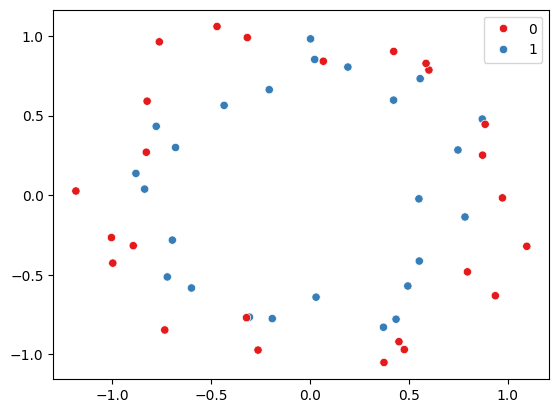

In [9]:
sns.scatterplot(x = X[ : , 0] , y = X[ : , 1] , hue = y , palette = 'Set1') 
plt.show()

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [11]:
# create a nural network 
model = Sequential()

model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [13]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 500 , verbose = 0)

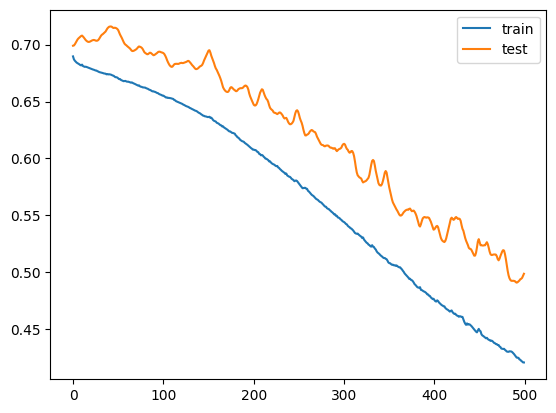

In [14]:
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label = 'test')
plt.legend()
plt.show()

### Early Stopping

In [15]:
model = Sequential()

model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [16]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [18]:
# early stopping 
early_stopping = EarlyStopping(
    monitor = 'val_loss', 
    min_delta = 0.00001,
    patience = 20, 
    verbose = 1, 
    mode = 'auto', 
    baseline = None,
    restore_best_weights = False
)

In [19]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 1000 , callbacks = early_stopping)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.5250 - loss: 0.6903 - val_accuracy: 0.4000 - val_loss: 0.6967
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5250 - loss: 0.6881 - val_accuracy: 0.4000 - val_loss: 0.6973
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5250 - loss: 0.6868 - val_accuracy: 0.4000 - val_loss: 0.6981
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5250 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5250 - loss: 0.6860 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5250 - loss: 0.6851 - val_accuracy: 0.4000 - val_loss: 0.7005
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5250 - loss: 0.6844 - val_accuracy: 0.4000 - val_loss: 0.7019
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5250 - loss: 0.6839 - val_accuracy: 0.400

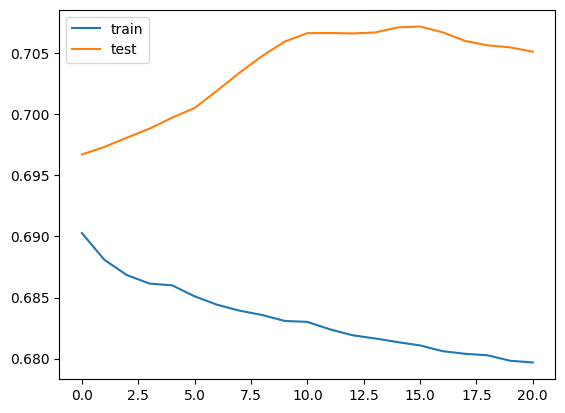

In [20]:
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label = 'test')
plt.legend()
plt.show()